# Dobble Tutorial
# Part 1 - Dobble Dataset Overview

## Goal

In this notebook we provide an overview of the Dobble dataset.
We will cover:

* Loading and viewing the Dobble dataset

## References

* [Dobble Dataset](https://www.kaggle.com/grouby/dobble-card-images)
* [Dobble Challenge](https://avnet.me/dobble)


## Version History
* Jan 17, 2023
    * Preliminary revision

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
import gc


#
# Parameters
#


dir = './dobble-dataset'
nrows = 146
ncols = 146
#nrows = 224
#ncols = 224

nchannels = 3

card_decks = [
    'dobble_deck01_cards_57',
    'dobble_deck02_cards_55',
    'dobble_deck03_cards_55',
    'dobble_deck04_cards_55',
    'dobble_deck05_cards_55',
    'dobble_deck06_cards_55',
    'dobble_deck07_cards_55',
    'dobble_deck08_cards_55',
    'dobble_deck09_cards_55',
    'dobble_deck10_cards_55'
    ]
nb_card_decks = len(card_decks)
print("")
print("PARAMETERS:")
print("Normalized shape of images :", ncols, " x ", nrows )
print(nb_card_decks, " Card Decks : ", card_decks)


PARAMETERS:
Normalized shape of images : 146  x  146
10  Card Decks :  ['dobble_deck01_cards_57', 'dobble_deck02_cards_55', 'dobble_deck03_cards_55', 'dobble_deck04_cards_55', 'dobble_deck05_cards_55', 'dobble_deck06_cards_55', 'dobble_deck07_cards_55', 'dobble_deck08_cards_55', 'dobble_deck09_cards_55', 'dobble_deck10_cards_55']


In [2]:
#
# Capture images/labels from data set for training and testing
#

def capture_card_filenames(directory_name):
    subdirs = ['{}/{}'.format(directory_name,i) for i in os.listdir(directory_name) ]
    cards = []
    for i,subdir in enumerate(subdirs):
        cards += ['{}/{}'.format(subdir,i) for i in os.listdir(subdir)]
    del subdirs
    return cards

train_cards = []
for d in range(0,nb_card_decks):
    train_dir = dir+'/'+card_decks[d]
    train_cards.append( capture_card_filenames(train_dir) )


In [3]:
#
# Read images and pre-process to fixed size
#

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for i,image in enumerate(list_of_images):
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncols), interpolation=cv2.INTER_CUBIC))
        y_str = image.split('/')
        y.append(int(y_str[len(y_str)-2]))
    return X,y

train_X = []
train_y = []
for d in range(0,nb_card_decks):
   X,y = read_and_process_image(train_cards[d])
   train_X.append( np.array(X) )
   train_y.append( np.array(y) )


print("")
print("TRAINING DATA SET:")
for d in range(0,nb_card_decks):
    print("Shape of deck", d, " data (X) is :", train_X[d].shape)



TRAINING DATA SET:
Shape of deck 0  data (X) is : (57, 146, 146, 3)
Shape of deck 1  data (X) is : (55, 146, 146, 3)
Shape of deck 2  data (X) is : (55, 146, 146, 3)
Shape of deck 3  data (X) is : (62, 146, 146, 3)
Shape of deck 4  data (X) is : (55, 146, 146, 3)
Shape of deck 5  data (X) is : (55, 146, 146, 3)
Shape of deck 6  data (X) is : (55, 146, 146, 3)
Shape of deck 7  data (X) is : (55, 146, 146, 3)
Shape of deck 8  data (X) is : (58, 146, 146, 3)
Shape of deck 9  data (X) is : (55, 146, 146, 3)


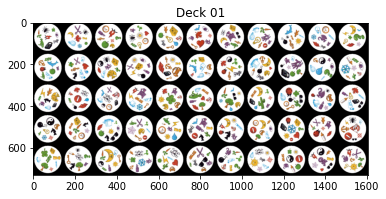

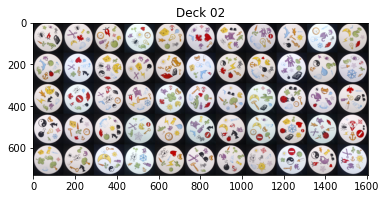

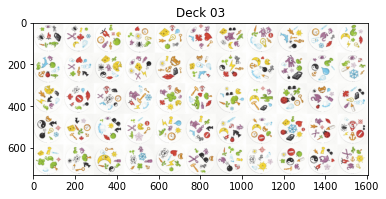

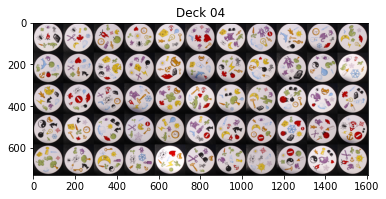

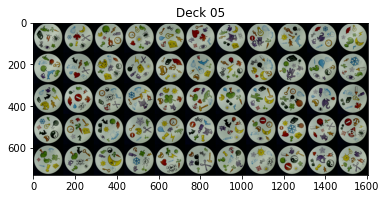

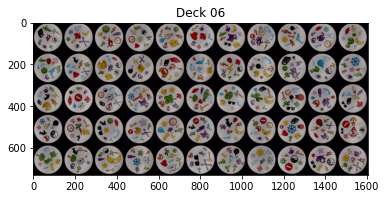

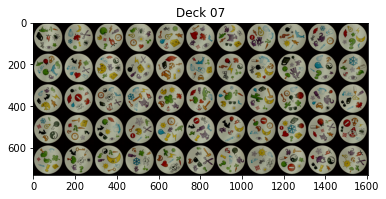

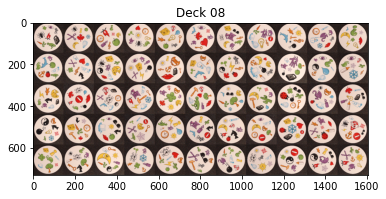

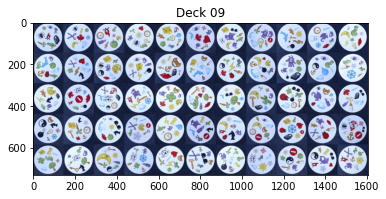

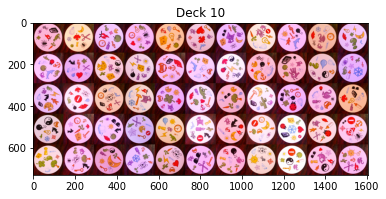

In [4]:
#
# Display card decks (cards 1-55)
#

def create_collage(deck_id,cards_X,cards_y):

    cards_idx = np.where(np.logical_and(cards_y>=1, cards_y<=55))
    cards_55 = cards_X[cards_idx]
    
    h,w,z = cards_X[0,:,:,:].shape
    w11 = w * 11
    h5 = h * 5
    collage = np.zeros((h5,w11,3),np.uint8)
    idx = 0
    for r in range(0,5):
        for c in range(0,11):
            collage[r*h:(r+1)*h,c*w:(c+1)*w,:] = cards_55[idx,:,:,:]
            idx = idx + 1

    title = "Deck %02d"%(deck_id)
    #cv2.imshow(title,collage)
    #cv2.waitKey(0)
    imgplot = plt.imshow(cv2.cvtColor(collage,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

#print("")
#print("VIEW CARD DECKS:")
#print("... press any key to continue ...")

for d in range(0,nb_card_decks):
    create_collage(d+1,train_X[d],train_y[d])


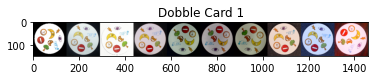

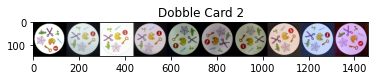

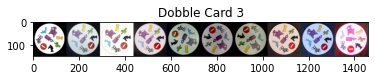

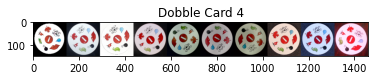

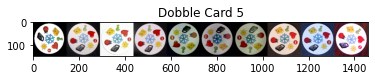

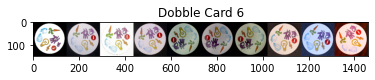

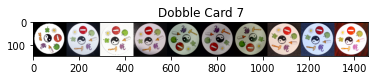

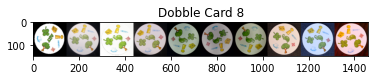

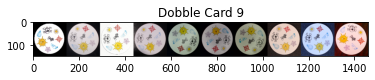

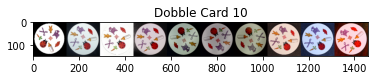

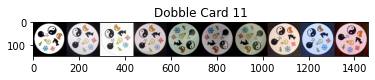

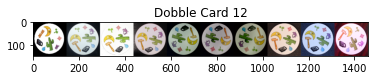

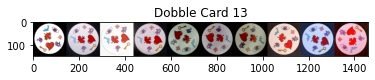

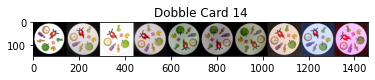

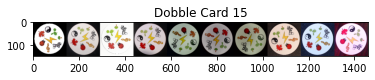

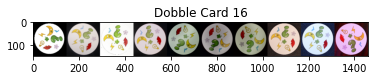

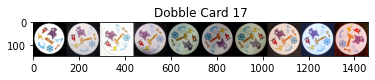

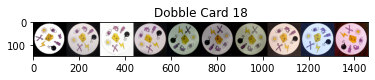

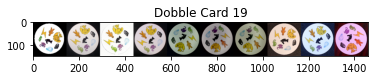

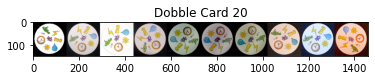

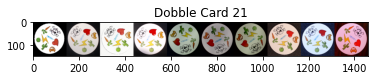

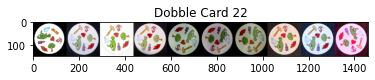

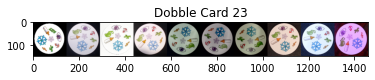

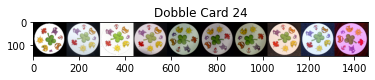

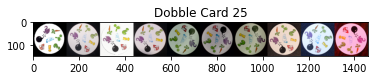

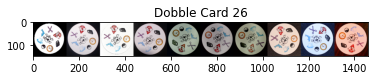

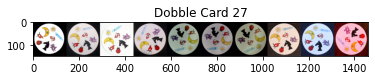

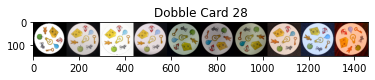

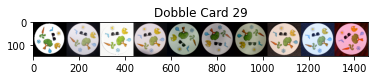

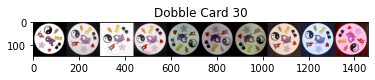

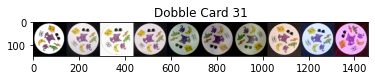

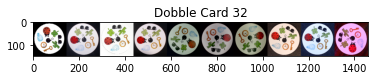

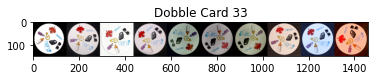

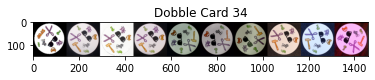

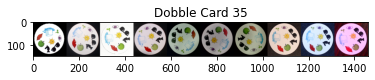

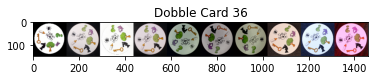

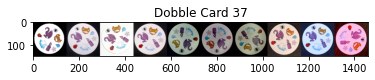

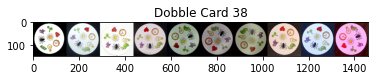

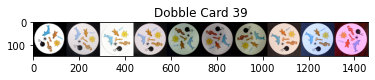

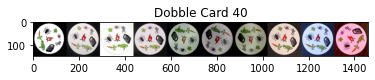

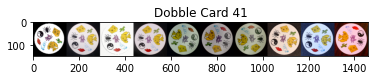

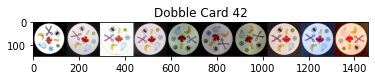

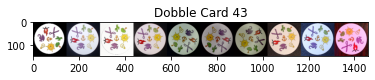

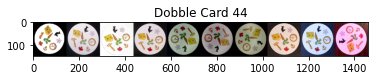

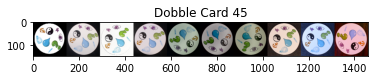

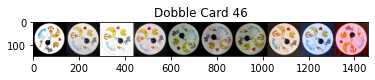

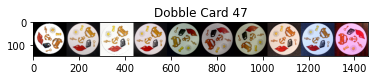

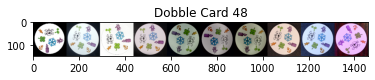

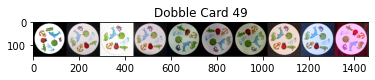

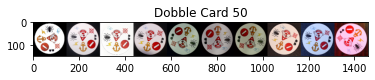

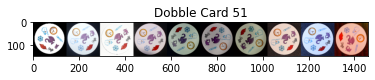

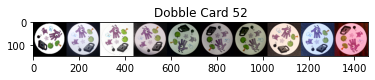

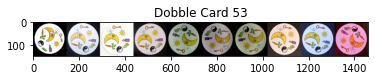

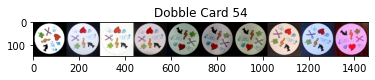

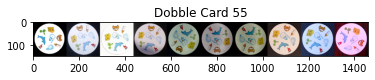

In [5]:
#
# Display 55 cards
#

train_X = np.concatenate( train_X, axis=0 )
train_y = np.concatenate( train_y, axis=0 )
ntrain = len(train_y)

#print("")
#print("VIEW CARDS:")
#print("... press any key to continue (ESC to quit) ...")

for i in range(1,55+1):
    idx = (train_y==i) 
    cards_X = train_X[idx]
    cards_y = train_y[idx]
    ncards = len(cards_y)
    img = cards_X[0,:,:,:]
    for c in range(1,ncards):
       img = cv2.hconcat([img,cards_X[c,:,:,:]])
    title = "Dobble Card " + str(i)
    #cv2.imshow(title,img)
    #key = cv2.waitKey(0)
    #if key == 27:
    #    break
    imgplot = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



In [6]:
#
# Load Symbol labels and Card-Symbol mapping
#

import csv
from collections import OrderedDict

symbols = OrderedDict()
with open(dir+'/dobble_symbols.txt','r') as file:
    reader = csv.reader(file)
    for row in reader:
        #print(row)
        if row[0] == '\ufeff1': # wierd character occuring on linux
            row[0] = '1'
        if row[0] == 'ï»¿1': # wierd character occuring on windows
            row[0] = '1'
        symbol_id = int(row[0])
        symbol_label = row[1]
        symbols[symbol_id] = symbol_label

print("")
print("SYMBOLS:")
print(symbols)

mapping = OrderedDict()
with open(dir+'/dobble_card_symbol_mapping.txt','r') as file:
    reader = csv.reader(file)
    for row in reader:
        id = row[0]
        if row[0] == '\ufeff1': # wierd character occuring on linux
            row[0] = '1'
        if row[0] == 'ï»¿1': # wierd character occuring on windows
            row[0] = '1'
        card_id = int(row[0])
        card_mapping = []
        for i,val in enumerate(row[1:]):
            if val=='1':
                card_mapping.append( i+1 )
        mapping[card_id] = card_mapping

print("")
print("MAPPING:")
print(mapping)



SYMBOLS:
OrderedDict([(1, 'OneWay'), (2, 'Target'), (3, 'Lightning'), (4, 'Clown'), (5, 'Shades'), (6, 'Spider'), (7, 'Anchor'), (8, 'Tree'), (9, 'Web'), (10, 'Cat'), (11, 'Bomb'), (12, 'Lock'), (13, 'Dobble'), (14, 'Apple'), (15, 'Ghost'), (16, 'Man'), (17, 'Car'), (18, 'Moon'), (19, 'Eye'), (20, 'Clock'), (21, 'Scissors'), (22, 'Dinosaur'), (23, 'Spot'), (24, 'Key'), (25, 'Dog'), (26, 'Crayon'), (27, 'Exclamation'), (28, 'Horse'), (29, 'Cactus'), (30, 'Dolphin'), (31, 'Candle'), (32, 'Zebra'), (33, 'Drop'), (34, 'MapleLeaf'), (35, 'Fire'), (36, 'Turtle(ART)'), (37, 'Skull'), (38, 'Lips'), (39, 'Heart'), (40, 'Question'), (41, 'Cheeze'), (42, 'Sun'), (43, 'Ladybug'), (44, 'Snowflake'), (45, 'Treble'), (46, 'Icecube'), (47, 'Igloo'), (48, 'Carrot'), (49, 'Lightbulb'), (50, 'Bird(OK)'), (51, 'Clover'), (52, 'Flower'), (53, 'Bottle'), (54, 'YinYang'), (55, 'Hammer(STOP)'), (56, 'Dragon'), (57, 'Snowman')])

MAPPING:
OrderedDict([(1, [1, 8, 15, 16, 17, 18, 19, 20]), (2, [1, 9, 21, 22, 23

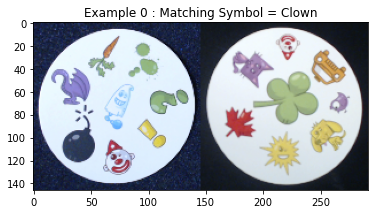

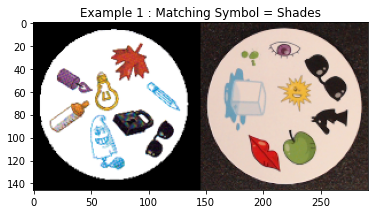

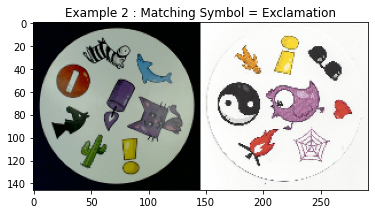

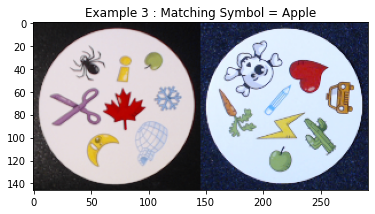

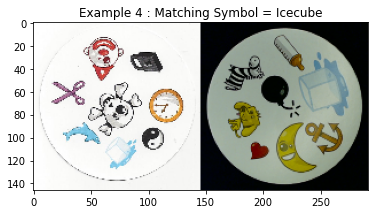

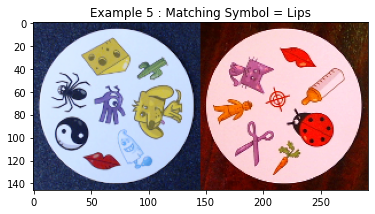

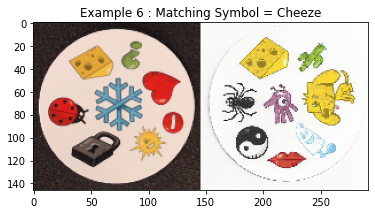

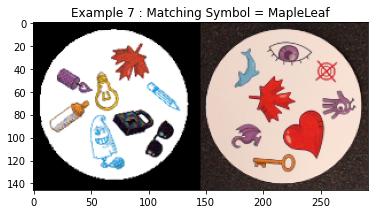

KeyError: 0

In [7]:
#
# Display matching symbols
#

import random

#print("")
#print("VIEW MATCHING SYMBOLS:")
#print("... press any key to continue (ESC to quit) ...")


for i in range(10):
    idx1 = random.randrange(1,ntrain+1)
    idx2 = random.randrange(1,ntrain+1)
    card1_X = train_X[idx1,:,:,:]
    card1_y = train_y[idx1]
    card2_X = train_X[idx2,:,:,:]
    card2_y = train_y[idx2]
    if ( card1_y == card2_y ):
        continue;

    card1_mapping = mapping[card1_y]
    card2_mapping = mapping[card2_y]
    symbol_ids = np.intersect1d(card1_mapping,card2_mapping)
    symbol_id = symbol_ids[0]
    symbol_label = symbols[symbol_id]
    img = cv2.hconcat( [card1_X,card2_X] )
    title = "Example " + str(i) + " : Matching Symbol = " + symbol_label
    #print(title)
    #cv2.imshow(title,img)
    #key = cv2.waitKey(0)
    #if key == 27:
    #    break
    imgplot = plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
